## Get input data

In [1]:
data = [i.strip('\n').split('\t') for i in open('/Users/Diego/Documents/School/ISTA539/final-project-dalcantara7/openclass_prize.train', 'r', encoding='utf8', errors='ignore')]
print(data[0])
print(" ")
print(data[1])

['What is the Turing Test?', 'The original Turing test involved three entities communicating with each other through computer terminals in separate rooms - a computer program trying to pass itself off as a human, a human trying to prove that she or he is human, and a human judge deciding which of the competitors is human and which a machine. This is different from the popular idea that it\'s about a human judging whether one subject is human or machine. The reason it\'s different is that Turing\'s original proposal was not intended as a practical test, but rather as a thought experiment making a philosophical argument - that it is impossible to determine whether something is "intelligent" better than by judging its linguistic interactions, and that therefore a machine that sounds intelligent has to be considered truly intelligent. And by "intelligent," Turing meant, like a human, with consciousness.', 'Which of the following is NOT an objection to the Turing Test mentioned in the readi

## Parse into input text and labels

In [2]:
X = []
Y = []
for i in range(len(data)):
    if i % 2 == 0:
        X.append(' '.join(data[i]))
    else:
        Y.append(data[i])

print(X[0:3])
print(" ")
print(Y[0:5])

['What is the Turing Test? The original Turing test involved three entities communicating with each other through computer terminals in separate rooms - a computer program trying to pass itself off as a human, a human trying to prove that she or he is human, and a human judge deciding which of the competitors is human and which a machine. This is different from the popular idea that it\'s about a human judging whether one subject is human or machine. The reason it\'s different is that Turing\'s original proposal was not intended as a practical test, but rather as a thought experiment making a philosophical argument - that it is impossible to determine whether something is "intelligent" better than by judging its linguistic interactions, and that therefore a machine that sounds intelligent has to be considered truly intelligent. And by "intelligent," Turing meant, like a human, with consciousness. Which of the following is NOT an objection to the Turing Test mentioned in the reading? In

## Split input into parts

In [3]:
questions = []
solutions = []
mastery_quest = []
master_qeust_ans = []
mastery_quest_wrong_ans = []
resources = []
for i in range(len(data)):
    if i % 2 == 0:
        questions.append(data[i][0])
        solutions.append(data[i][1])
        mastery_quest.append(data[i][2])
        master_qeust_ans.append(data[i][3])
        mastery_quest_wrong_ans.append(data[i][4])
        resources.append(data[i][5])

## Get index of last label with more than 1 occurrence

In [4]:
from collections import Counter

all_labels = [label for list in Y for label in list]
counter = Counter(all_labels)

n_most_common = counter.most_common()
index = -1

for j in range(len(n_most_common)):
    if n_most_common[j][1] < 2:
        index = j
        break

index

112

## Distribution of counts of all labels

Text(0, 0.5, 'Count of Frequency of Labels')

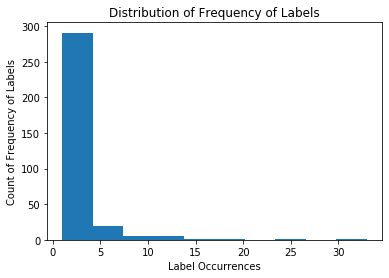

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df.rename(columns={ 0 : 'count' }, inplace=True)
ax = df.plot(kind='hist', legend=False)
ax.set_title("Distribution of Frequency of Labels")
ax.set_xlabel("Label Occurrences")
ax.set_ylabel("Count of Frequency of Labels")

## Toss out labels with fewer than 2 occurrences

In [6]:
for i in range(len(n_most_common)):
    if n_most_common[i][1] < 2:
        for j in range(len(Y)):
            if n_most_common[i][0] in Y[j]:
                Y[j].remove(n_most_common[i][0])


Y[0]

['Turing test', 'Computational linguistics']

Text(0, 0.5, 'Count of Frequency of Labels')

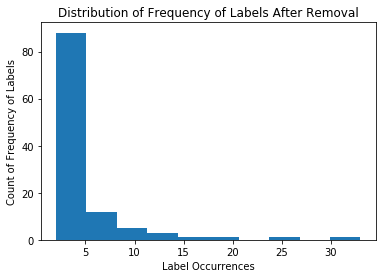

In [7]:
al = [label for list in Y for label in list]
c = Counter(al)

df1 = pd.DataFrame.from_dict(c, orient='index').reset_index()
df1.rename(columns={ 0 : 'count' }, inplace=True)
ax1 = df1.plot(kind='hist', legend=False)
ax1.set_title("Distribution of Frequency of Labels After Removal")
ax1.set_xlabel("Label Occurrences")
ax1.set_ylabel("Count of Frequency of Labels")

In [8]:
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

vectorizer = TfidfVectorizer()
X_trans = vectorizer.fit_transform(X)

mlb = MultiLabelBinarizer()
class_labels = mlb.fit_transform(Y)

all_labels = [label for list in Y for label in list]
counter = Counter(all_labels)

indexes = {idx + 1 : val for idx, val in enumerate(mlb.classes_)} 
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2, random_state=597)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, f1_score

def train_one_v_rest(X_train, Y_train, X_test, Y_test):
    predictions = np.zeros(Y_test.shape)
    classifiers = []
    for i in range(len(Y_train[0])):
        this_train = [l[i] for l in Y_train]
        # if 1 not in this_train: #<- was only needed for certain random state seeds
        #     missing.append(i)
        #     break
        # else: 
        this_test = [l[i] for l in Y_test]
        lr = LogisticRegression(class_weight={0:1, 1:180})
        lr.fit(X_train, this_train)
        classifiers.append(lr)
        preds = lr.predict(X_test)
        
        # gives F2 score for each class 
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='macro')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='micro')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='weighted')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # print(" ")
        # print(i)

        #set predictions in predictions matrix
        for j in range(len(preds)):
            if preds[j] == 1:
                predictions[j][i] = 1

    scores = []
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    scores.append(f1_score(Y_test, predictions, average='weighted'))

    return classifiers, scores

In [22]:
clfs, _ = train_one_v_rest(X_trans, class_labels, X_test, Y_test)

## Write model, label encode, and feature vectorizer to file for reuse

In [23]:
import pickle

with open("vectorizer.pickle", "wb") as f:
    pickle.dump(vectorizer, f)
with open("multi-label_binarizer.pickle", "wb") as f:
    pickle.dump(mlb, f)
with open("models.pickle", "wb") as f:
    pickle.dump(clfs, f)

## Test using class weight

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, f1_score

def train_one_v_rest(X_train, Y_train, X_test, Y_test, on_class_weight = 150):
    predictions = np.zeros(Y_test.shape)
    classifiers = []
    for i in range(len(Y_train[0])):
        this_train = [l[i] for l in Y_train]
        # if 1 not in this_train:
        #     missing.append(i)
        #     break
        # else:
        this_test = [l[i] for l in Y_test]
        lr = LogisticRegression(class_weight={0:1, 1:on_class_weight})
        lr.fit(X_train, this_train)
        classifiers.append(lr)
        preds = lr.predict(X_test)
        
        # gives F2 score for each class 
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='macro')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='micro')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='weighted')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # print(" ")
        # print(i)

        #set predictions in predictions matrix
        for j in range(len(preds)):
            if preds[j] == 1:
                predictions[j][i] = 1

    scores = []
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    scores.append(f1_score(Y_test, predictions, average='weighted'))

    return classifiers, scores

In [11]:
outerframe = []
for i in range(1000):
    _, scores = train_one_v_rest(X_train, Y_train, X_test, Y_test, i)
    outerframe.append(scores)

columns = ['macro', 'micro', 'weighted', 'f1']
scores_df = pd.DataFrame(outerframe, columns = columns)
scores_df.to_csv('scores_by_on_class_weight.csv')

In [18]:
print(scores_df[scores_df['f1'] == max(scores_df['f1'])])
print(scores_df[scores_df['macro'] == max(scores_df['macro'])])
print(scores_df[scores_df['micro'] == max(scores_df['micro'])])
print(scores_df[scores_df['weighted'] == max(scores_df['weighted'])])

macro     micro  weighted        f1
172  0.164363  0.295699  0.337648  0.505512
173  0.164363  0.294643  0.337648  0.505512
174  0.164363  0.294643  0.337648  0.505512
175  0.164363  0.294643  0.337648  0.505512
176  0.164363  0.294643  0.337648  0.505512
177  0.164363  0.294643  0.337648  0.505512
178  0.164363  0.294643  0.337648  0.505512
179  0.164363  0.294643  0.337648  0.505512
180  0.164363  0.294643  0.337648  0.505512
181  0.164363  0.294643  0.337648  0.505512
182  0.164363  0.294643  0.337648  0.505512
183  0.164363  0.294643  0.337648  0.505512
184  0.164363  0.294643  0.337648  0.505512
Empty DataFrame
Columns: [macro, micro, weighted, f1]
Index: []
Empty DataFrame
Columns: [macro, micro, weighted, f1]
Index: []
Empty DataFrame
Columns: [macro, micro, weighted, f1]
Index: []


## Test using parts of question

In [96]:
parts = [questions, solutions, mastery_quest, master_qeust_ans, mastery_quest_wrong_ans, resources]

outerframe = []
for part in parts:
    trans = vectorizer.transform(part)
    X_train, X_test, Y_train, Y_test = train_test_split(trans, class_labels, test_size=0.2, random_state=597)
    _, scores = train_one_v_rest(X_train, Y_train, X_test, Y_test)
    outerframe.append(scores)

columns = ['macro', 'micro', 'weighted', 'f1']
scores_df = pd.DataFrame(outerframe, columns = columns)
scores_df.to_csv('scores_by_parts_of_input.csv')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMet

## Test using combinations of parts of questions

In [97]:
input_parts = [questions, solutions, mastery_quest, master_qeust_ans, mastery_quest_wrong_ans, resources]

q_r = []
q_a = []
a_r = []
q_r_a = []
for i in range(len(questions)):
    q_r.append(questions[i] + ' ' + resources[i])
    q_a.append(questions[i] + ' ' + solutions[i])
    a_r.append(solutions[i] + ' ' + resources[i])
    q_r_a.append(questions[i] + ' ' + solutions[i] + ' ' + resources[i])

combs = [q_r, q_a, a_r, q_r_a]
outerframe = []
for sub in combs:
    trans = vectorizer.transform(sub)
    X_train, X_test, Y_train, Y_test = train_test_split(trans, class_labels, test_size=0.2, random_state=597)
    _, scores = train_one_v_rest(X_train, Y_train, X_test, Y_test)
    outerframe.append(scores)
    
columns = ['macro', 'micro', 'weighted', 'f1']
scores_df = pd.DataFrame(outerframe, columns = columns)
scores_df.to_csv('scores_by_parts_of_input_combs.csv')

# Below this line completed and not in use 
___

## Find best random state split for train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, f1_score

def train_one_v_rest(X_train, Y_train, X_test, Y_test):
    predictions = np.zeros(Y_test.shape)
    for i in range(len(Y_train[0])):
        missing = []
        this_train = [l[i] for l in Y_train]
        if 1 not in this_train:
            missing.append(i)
            break
        else:
            this_test = [l[i] for l in Y_test]
            lr = LogisticRegression(class_weight={0:1, 1:150})
            lr.fit(X_train, this_train)
            preds = lr.predict(X_test)
        
        # gives F2 score for each class 
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='macro')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='micro')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # precision, recall, _, __ = precision_recall_fscore_support(this_test, preds, average='weighted')
        # f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        # print(f2_score)
        # print(" ")
        # print(i)

        #set predictions in predictions matrix
        for j in range(len(preds)):
            if preds[j] == 1:
                predictions[j][i] = 1

    scores = []
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    scores.append(f2_score)
    scores.append(f1_score(Y_test, predictions, average='weighted'))

    return scores, missing


/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
from sklearn.linear_model import LogisticRegression

outerframe = []
missing_outer = []
for j in range(0, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2, random_state=j)
    scores, missing = train_one_v_rest(X_train, Y_train, X_test, Y_test)
    outerframe.append(scores)
    missing_outer.append(missing)

columns = ['macro', 'micro', 'weighted', 'f1']
scores_df = pd.DataFrame(outerframe, columns = columns)
scores_df.to_csv('scores_by_rand_state.csv')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMet

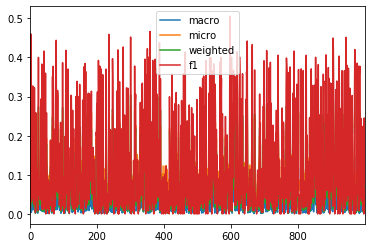

In [10]:
scores_df[columns].plot(kind='line')


In [12]:
print(scores_df[scores_df['f1'] == max(scores_df['f1'])])
print(scores_df[scores_df['macro'] == max(scores_df['macro'])])
print(scores_df[scores_df['micro'] == max(scores_df['micro'])])
print(scores_df[scores_df['weighted'] == max(scores_df['weighted'])])

macro     micro  weighted        f1
597  0.161259  0.298713  0.336427  0.505416
        macro     micro  weighted        f1
597  0.161259  0.298713  0.336427  0.505416
        macro     micro  weighted        f1
597  0.161259  0.298713  0.336427  0.505416
        macro     micro  weighted        f1
597  0.161259  0.298713  0.336427  0.505416


In [10]:
missing_outer[597]

[]